<h1 style="font-family:verdana;"> <center>📚🚥 MY FIRST PROJECT ON FEATURE ENGINEERING &amp; LINEAR REGRESSION 🚥📚</center> </h1>
<h3><center style="color:#159364; font-family:cursive;">A Beginner's Approach</center></h3>

***


![picture.png](https://cdn.pixabay.com/photo/2017/09/27/16/15/sign-2792576_1280.png)
<cite>Image from www.pixabay.com by ArtsyBee</cite>

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">Being a pure novice in the field of data science. Its one of the early attempts to explore the data and perform data cleaning or data preparation jobs before finally moving onto building Machine Learning Models to predict the sales price of property.</p>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<p style="font-size:18px; font-family:verdana; line-height: 1.7em">We have got 4 data sets.</p>
<ol style="font-size:18px; font-family:verdana; line-height: 1.7em">
<li>AmesHousing Data - Original Ames Housing Data Set prepared by Dean De Cock, and described in the paper Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project.
<li>Train Data - It may used to train the data
<li>Test Data - It may be used to test the data with outputs from the model
<li>Target Data - We finally use the model to predict the final target data
</ol>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; Just to tell, I am just a beginner but what Kaggle taught me, I just want to return you back. If you find this notebook useful, please upvote it so that it can reach a bigger audience. 
</div>
 <a style="font-size:18px; font-family:verdana; line-height: 1.7em" href="https://www.kaggle.com/code/shubhamksingh/create-beautiful-notebooks-formatting-tutorial"> And special thanks to @ShubhamSingh for teaching me How to create a Beautiful Notebook.</a>

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">Actually the original data (pt no. 1) set has been divided in 3 parts. But we will work with the original data set only. </p>

In [2]:
df = pd.read_csv("/kaggle/input/housing/AmesHousing.csv")
# train = pd.read_csv("/kaggle/input/housing/train.csv")
# test = pd.read_csv("/kaggle/input/housing/test.csv")
# target = pd.read_csv("/kaggle/input/housing/target.csv")

# <center style="color:crimson; font-family:verdana; line-height: 1.7em">Data Exploration<a id="data_exploration"></a></center>

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">Let's explore the data Set. It seems to be huge one to begin with, specially with my limited knowledge. But I hope me with my machine can definitely handle it.<br>Let's be POSITIVE</p>

In [3]:
# Lets explore the shape of the dataset
df.shape

(2930, 82)

In [4]:
# Lets have a glimpse of the dataset
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">We understand we ultimately have to predict the sale price.</h3>

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">But where do we start. Lets make some plots and find some basic correlations with sales price.<br>Actually trying to get a hang of things!!!</p>

<Axes: xlabel='SalePrice'>

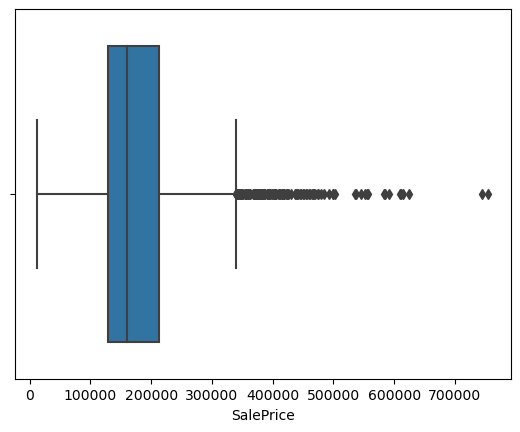

In [5]:
# Lets create a distplot to just overview if the dataset has any outliers
sns.boxplot(data=df,x="SalePrice")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


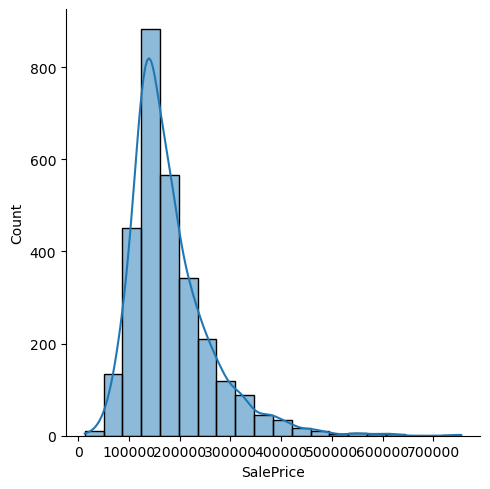

In [6]:
# Lets make a distribution plot of Sales Price
sns.displot(df["SalePrice"],bins=20,kde=True);

/tmp/ipykernel_19/647229299.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

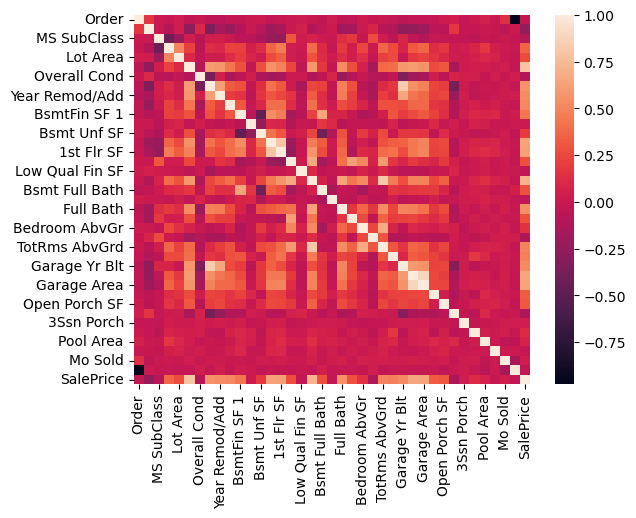

In [7]:
# Lets make a heatmap for correlation with Sales Price
sns.heatmap(df.corr())

In [8]:
# The above headmap is too clumsy with so many parameters
# Lets try something simple
df.corr()["SalePrice"].sort_values()

/tmp/ipykernel_19/1247391418.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["SalePrice"].sort_values()


PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Order             -0.031408
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0

# <center id="data-cleanup" style="color:crimson; font-family:verdana; line-height: 1.7em">DATA CLEANUP</center>

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">We will break the basic Data cleanup jobs in 3 parts.</p>
<ol style="font-size:18px; font-family:verdana; line-height: 1.7em">
<li>Outliners - We will try to find out the outliners and act on them so that it does not affect our model performance.
<li>Missing Data
<li>Transforming Data
</ol>

# <center style="color:crimson; font-family:verdana; line-height: 1.7em">DATA CLEANUP - OUTLINERS</center>

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">Lets start with Outliners.<br><b>We have already seen above that Overall Quality has highest Correlation</b><br>So we have Lets plot a simple scatter plot.</p>

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

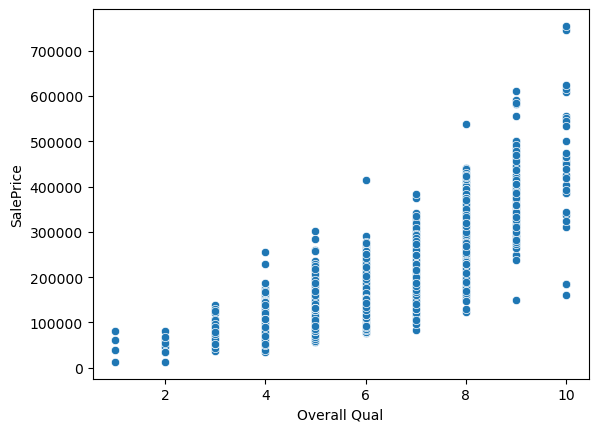

In [9]:
# Scatter plot with Overall Quality and Sales Price
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">Observation :</h3> 

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">Overall Quality is between on 1 and 10. And we can see the outliers.<br>
We can see some points with very low Sales Price but with overall quality of 09 and 10. (3 points)<br>
Lets try the next highest correlation feature i.e. Gr Liv Area.</p>

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

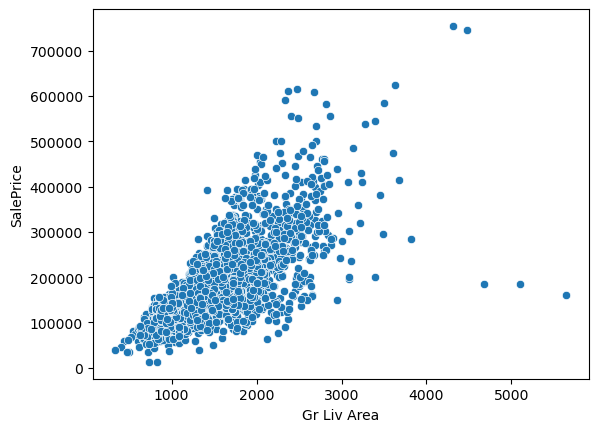

In [10]:
# Scatter plot Living Area and Sales Price
sns.scatterplot(data=df, x='Gr Liv Area',y='SalePrice')

<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">Observation :</h3>  
<p style="font-size:18px; font-family:verdana; line-height: 1.7em">We again see 3 points with higher Gr Liv Area with less SalePrice. <br>
Let's identify the same with Pandas.</p>

In [11]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,1183,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [12]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">Observation :</h3> 
<p style="font-size:18px; font-family:verdana; line-height: 1.7em">So we have actually 4 points which have got higher Overall Quality but with very low Sales Price. <br>
And 3 points with higher Living Space and less Sales Price. And these 3 points are common. Lets drop the rows with the index values of 1498,2180,2181.</p>

In [13]:
# We finally drop the outliers based on index values
df = df.drop(index=[1498,2180,2181],axis=0)

In [14]:
# We finally recheck the data frame 
df.shape

(2927, 82)

<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">Thoughts :</h3> 

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">So we have deleted the outliers that was identified and the data has been reduced to 2927 rows instead of initial 2930.<br>
But we may also explore the 3 points whether this 3 points were the oldest or most recent. Whether these are the changes in trends?<br>
We can also explore other conditions for outliers. But lets be satisfied with all that we have right now with respect to outliers.<br>
Next lets do something with the Missing Data.</p>

# <center style="color:crimson; font-family:verdana; line-height: 1.7em">DATA CLEANUP - MISSING DATA</center>

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">We will try to find and act on the missing data</p>

In [15]:
# Lets have a look at the columns
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">Removing the PID</h3>

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">We already have an index, so we don't need the PID unique identifier for the regression we will perform later on.</p>

In [16]:
df = df.drop("PID",axis=1)


In [17]:
len(df.columns)

81

<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">Percentage of Missing values</h3>

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">It is important to find out what is the percentage of missing values for each column before we actually act on the same. In case, in particular column most of the values are missing, it makes no sense to actually take the same forward for machine learning.<br>
So we create a function, which can actually be re-used for future notebooks</p>

In [18]:
# Percentage of missing data for each row in dataset
def percent_missing(df):
    # calculates percentage
    percent_nan = 100 * df.isnull().sum() / len(df) 
    # filter greater than 0 and sort data
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [19]:
percent_nan = percent_missing(df)
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

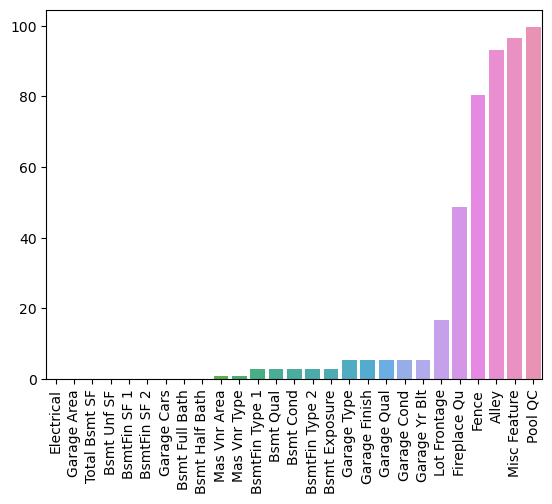

In [20]:
# Plot the percentage in a barplot
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90); # Semicolon removes the text before charts

<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">Observation :</h3>  

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">There are a lot of missing values varied in different columns. In some columns its minimal but in some columns most of the data is missing.<br>
However, the missing data can have several implications. Such as in case of Pool QC, it may be that there is no Pool on offer.<br><br>
In some cases such as electrical, garage area it seems that even less than 1% data is missing.<br><br>
We can act differently for differnt columns</p>

<ol style="font-size:18px; font-family:verdana; line-height: 1.7em">
<li>Remove row of missing data
<li>Remove the entire column or feature
<li>Replace the missing data
<li>Interpret the missing data from other columns
</ol>

Lets first explore the columns with less than 1% of missing data

In [21]:
# Columns with less than 1% missing data
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

<p style="font-size:18px; font-family:verdana; line-height: 1.7em; color:blue"><b>In some cases, it may be that a single row may contain multiple missing data columns. Lets see further.</b></p>

In [22]:
df[df['Electrical'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,1578,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [23]:
df[df['Garage Area'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,2237,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">Observation :</h3> 

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">So the missing data w.r.t Electrical and Garage Area are different. But these are only single rows. We can actually think of dropping them.</p>

In [24]:
# Dropping missing data rows for electrical and garage area
df = df.dropna(axis=0,subset=['Electrical','Garage Area'])

In [25]:
len(df)

2925

In [26]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">Observation :</h3>
<p style="font-size:18px; font-family:verdana; line-height: 1.7em">We can see that nos. of columns of missing data has already been taken care of by just dropping 2 rows.</p>

In [27]:
df[df['Bsmt Unf SF'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [28]:
df[df['Total Bsmt SF'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [29]:
df[df['BsmtFin SF 2'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [30]:
df[df['BsmtFin SF 1'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [31]:
df[df['Bsmt Full Bath'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1498,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [32]:
df[df['Bsmt Half Bath'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1498,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [33]:
df.iloc[[1341,1497]]['Bsmt Qual']

1341    NaN
1497    NaN
Name: Bsmt Qual, dtype: object

<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">Observation :</h3> 

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">We understand that there is no basement. So its better to logically replace the basement numeric columns with 0 and basement string columns with None</p>

In [34]:
# Numerical Basement Data
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [35]:
# String Basement Data
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

(0.0, 1.0)

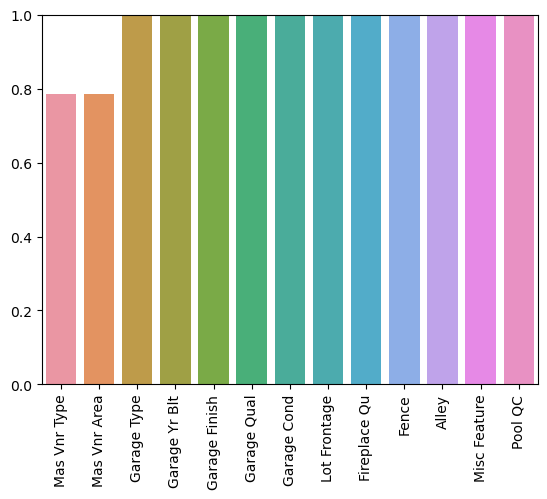

In [36]:
percent_nan = percent_missing(df)
# Plot the percentage in a barplot
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90); 
plt.ylim(0,1)

<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">Observation :</h3> 

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">Now with the last 2 columns having less than 1% data missing i.e. Mas Vnr Type and Mas Vnr Area.<br>
Lets cheque what are the unique values in Mas Vnr Type</p>

In [37]:
df['Mas Vnr Type'].unique()

array(['Stone', 'None', 'BrkFace', nan, 'BrkCmn', 'CBlock'], dtype=object)

<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">Observation :</h3>  
<p style="font-size:18px; font-family:verdana; line-height: 1.7em">Considering, there is unique value of None in the above result. So it may happen that the missing values of Mas Vnr Type may be just the type None.<br>
So we replace the missing Mas Vnr Type by None and also replace Mas Vnr Area by 0.</p>

In [38]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

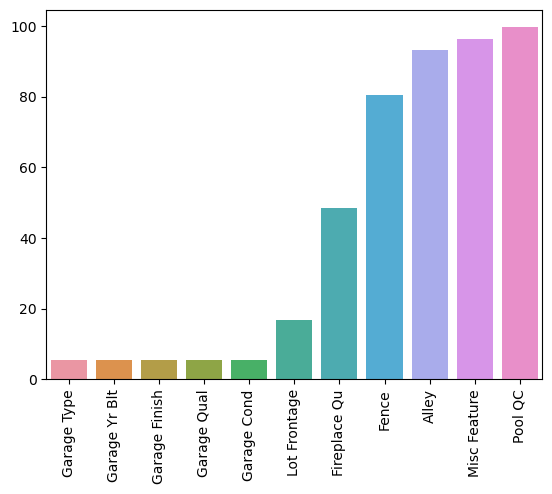

In [39]:
percent_nan = percent_missing(df)
# Plot the percentage in a barplot
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90); 

<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">Observation :</h3>  

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">So now all our missing data now is more than 1%. We cannot think of atleast dropping them. What options does we have?<br><br></p>

<ol style="font-size:15px; font-family:verdana; line-height: 1.7em; color:blue">

<li>Dropping the feature columns - Its extremely simple. But its only logical when most of the data such as maybe 99% data is missing. On the flip side, in the future if this column important and we have dropped it, it would really hamper our machine learning model.<br>

<li>Filling in missing data - We are artificially changing the ground truth. Must apply transformation to all future data. In a simple case, may be its actual value is 0 and thats why the data is missing. On complex cases, we can replace missing or null values with statistical estimation.
</ol>

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">So lets start to put our logic.<br><br>
From the above chart its quite visible that a no. of garage features are missing. It may be the case that actually there are no garages in the house. Hence, let us give the same treatment that we gave to our basement.</p>

In [40]:
df['Garage Type'].unique()

array(['Attchd', 'BuiltIn', 'Basment', 'Detchd', nan, 'CarPort', '2Types'],
      dtype=object)

In [41]:
# Garage String Columns
gar_str_cols = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [42]:
# Garage Numeric Columns
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

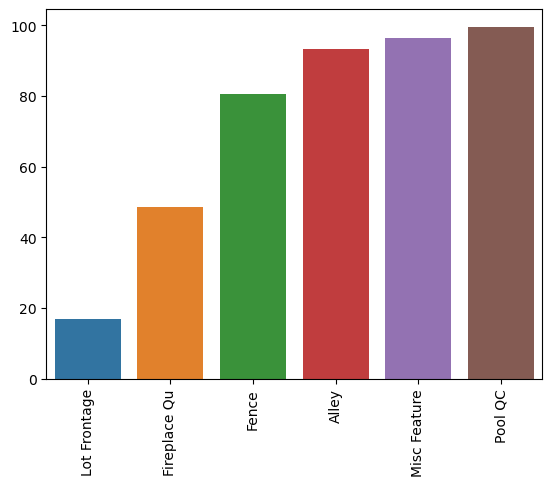

In [43]:
percent_nan = percent_missing(df)
# Plot the percentage in a barplot
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90); 

<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">Observation :</h3> 

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">Again for features such as Fence, Alley, Misc Features and Pool QC we see that more than 80% of the data is missing.<br>
It may be the case that the house may not have a pool or Alley. So we can either replace it by something like None or 0. But again most of the data is missing.<br><br>
Se let's actually drop the features from our dataset.</p>

In [44]:
df = df.drop(['Fence','Alley','Misc Feature','Pool QC'],axis=1)

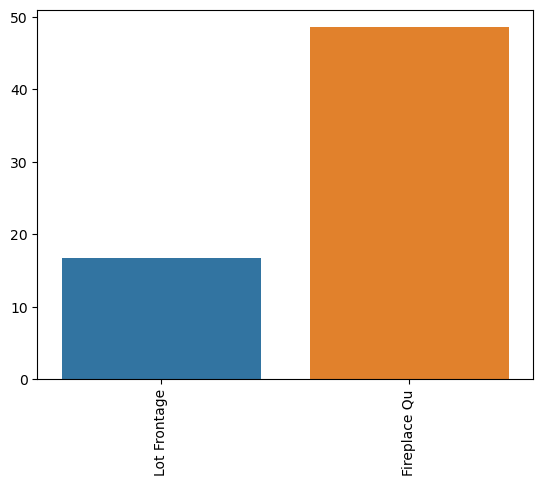

In [45]:
percent_nan = percent_missing(df)
# Plot the percentage in a barplot
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90); 

<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">Observation :</h3> 

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">At last, we are to the last 2 columns of our missing data. Its inbetween the extremes. So we need to be extra careful.<br><br>
Lets explore.</p>

In [46]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [47]:
df['Lot Frontage'].value_counts()

60.0     276
80.0     137
70.0     133
50.0     116
75.0     105
        ... 
119.0      1
137.0      1
25.0       1
152.0      1
133.0      1
Name: Lot Frontage, Length: 128, dtype: int64

<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">Observation :</h3>  

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">From the above, its evident that Fireplace Qu has String and maybe for the missing data there is no fireplace. So we will replace the missing values by none. <br><br>
But in case of Lot frontage, its a numeric value with a lot of variations. From the data set and doing some *googling and kaggling*, we come to understand that this column may be somewhat linked to Neighborhood Column. So we will check that too.</p>

In [48]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

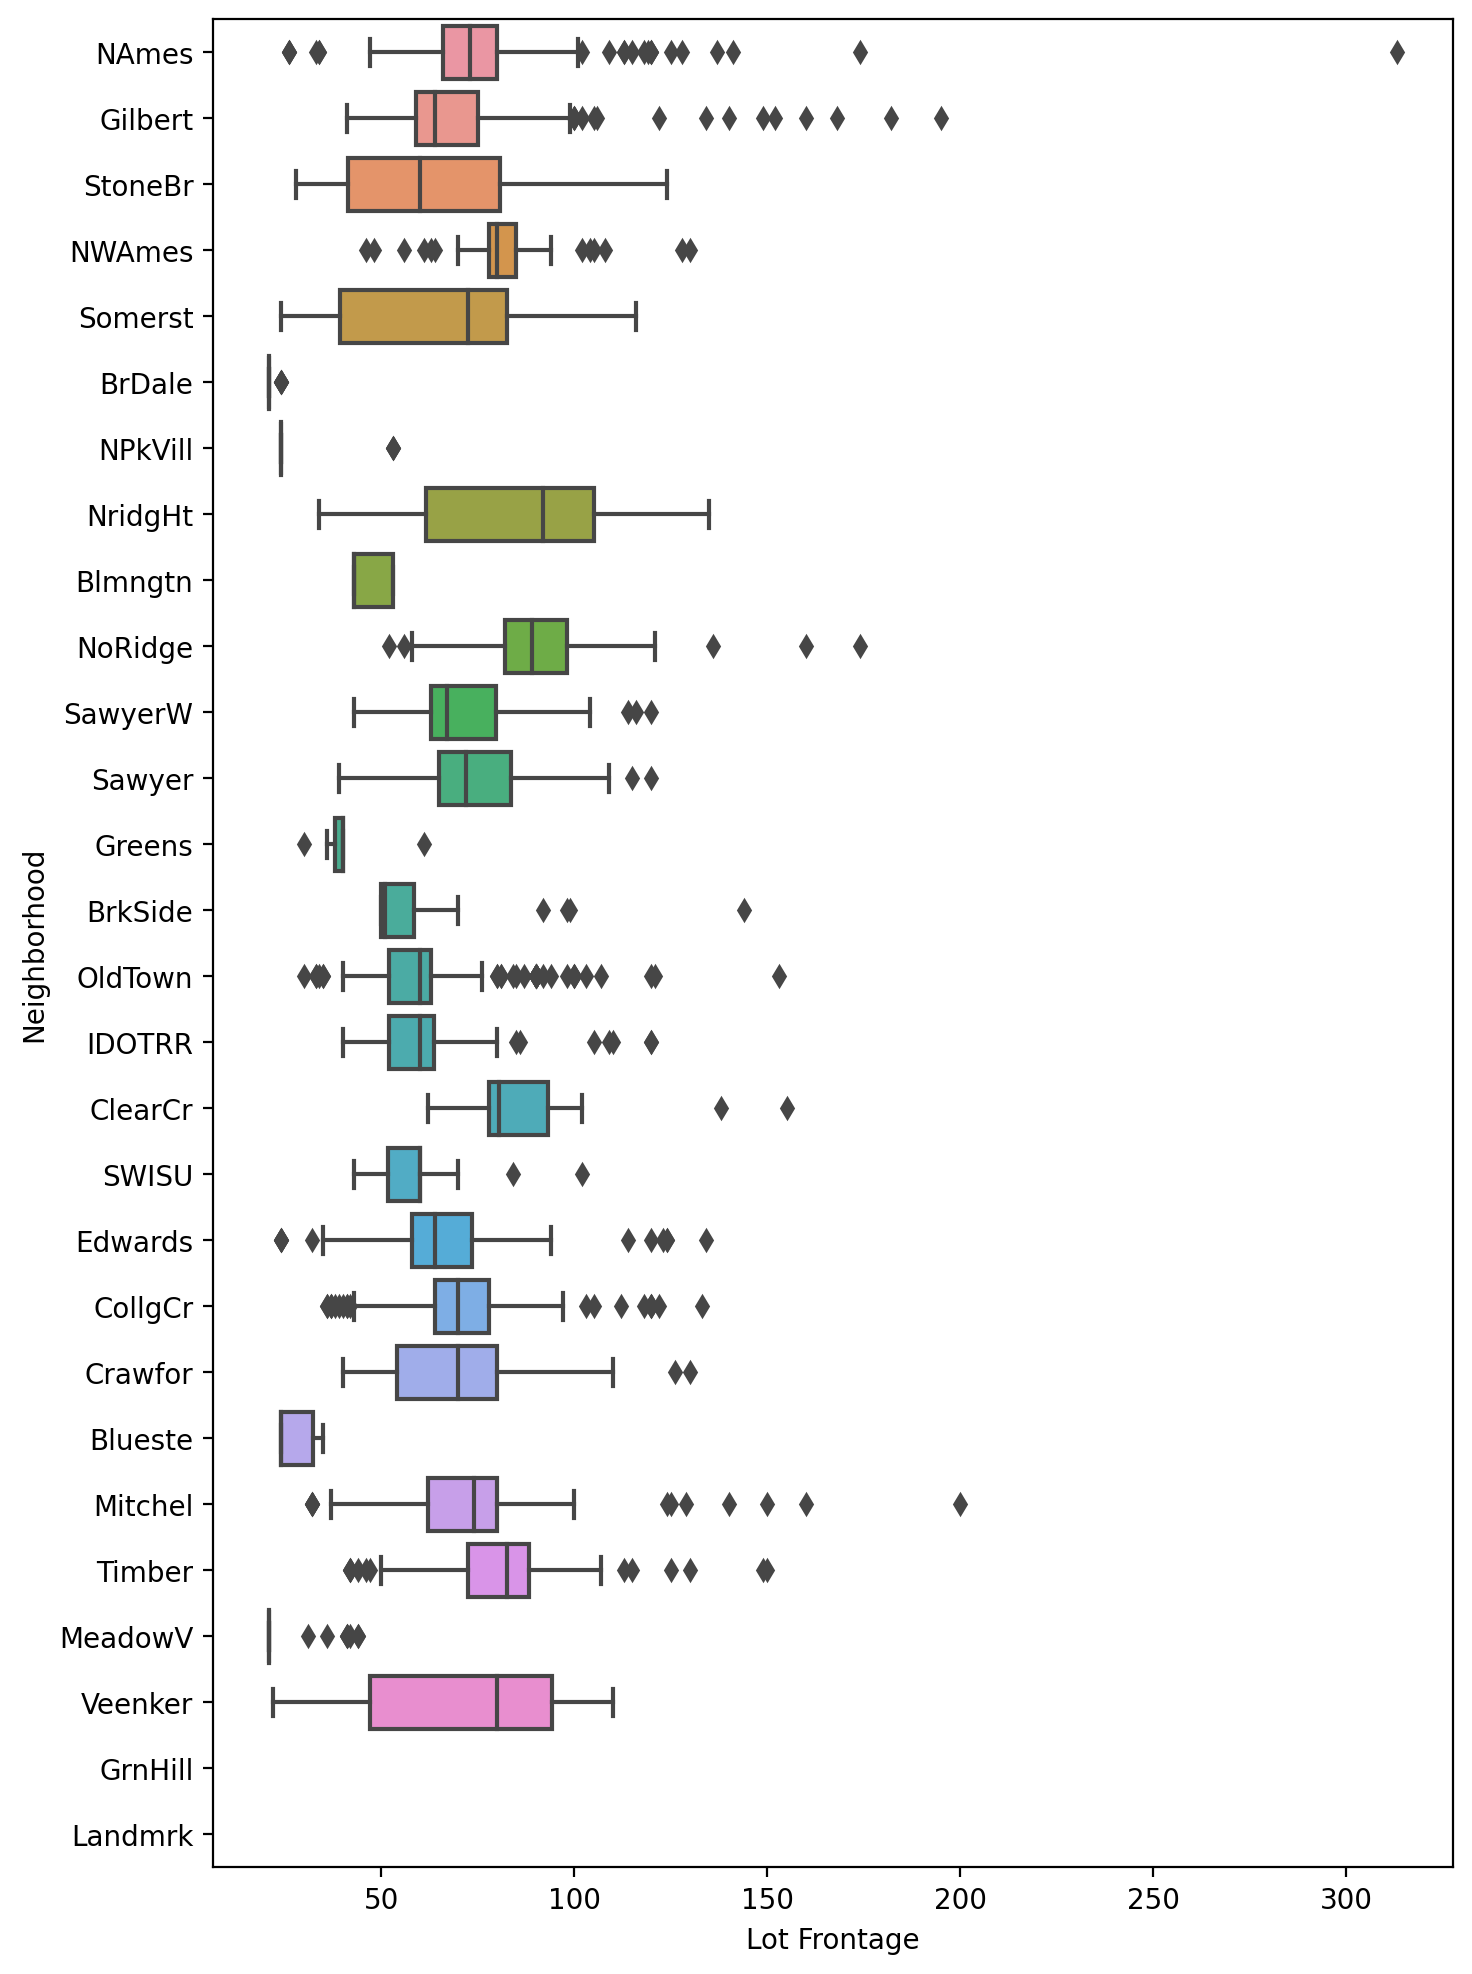

In [49]:
plt.figure(figsize=(8,12),dpi=200) # To make the plot a bit taller for better visualisation
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">Observation :</h3> 

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">Though there are a lot of outliers, its not too illogical to assume that the same neighbourhoods will have similar lot frontage.<br>
So we decide to put the average lot frontage of that neighborhood into the missing values of Lot Frontage.</p>

In [50]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [51]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [52]:
percent_nan = percent_missing(df)
percent_nan

Lot Frontage    0.102564
dtype: float64

In [53]:
df.isnull().sum()

Order             0
MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 77, dtype: int64

<h3 style="color:crimson; font-family:verdana; line-height: 1.7em">Observation :</h3>  

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">So we have still 3 missing values of Lot Frontage. If we take a closure look at the mean for each neighborhood, we find there are neighborhoods GrnHill and Lndmark which has means as NaN.<br><br>
It may be that the Lot doesnot have a frontage in these neighborhoods. So we replace them as 0.</p>

In [54]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [55]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

# <center style="color:crimson; font-family:verdana; line-height: 1.7em">DATA CLEANUP - TRANSFORMMING DATA</center>

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">We will try to work on some categorical data. We will have to find out the categorical fields.<br>
But to start with, As we can see MS SubClass, its a categorical column in a integer format. So we will convert the column into type String.<br>
Then we will break the dataframe into strings and numeric columns. We will replace the strings columns with categorical columns with Hot Encoding and finally join back the same to numeric columns to complete the dataframe.</p>

In [56]:
# Convert to string
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [57]:
# Return all columns with String 
object_df = df.select_dtypes(include='object')

In [58]:
# Return all columns with Numerical Values
numeric_df = df.select_dtypes(exclude='object')

In [59]:
# Replace with dummy variables
df_objects_dummies = pd.get_dummies(object_df,drop_first=True)

In [60]:
# Concatenate the object with string to complete the dataframe
final_df = pd.concat([numeric_df,df_objects_dummies], axis=1)

In [61]:
# Drop order column. Its just the index
final_df = final_df.drop('Order',axis=1)

In [62]:
final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


<h3 style="font-size:40px; font-family:verdana; line-height: 1.7em; color:blue"> Hurray. Success </h3>

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">We have successfully successfully removed all missing values.<br>We have actually done a lot of Data Engineering to actually complete the Data Cleanup procedure.<br><br><span style="color:crimson;">Now Lets Move on to Linear Regression.</span></p>

# <center style="color:crimson; font-family:verdana; line-height: 1.7em">Linear Regression</center>

<p style="font-size:18px; font-family:verdana; line-height: 1.7em">Now when we have the data, lets start performing linear regression.<br>
We will use scikitlearn tool with Elastic Net and Grid Search for our problem.</p>

In [63]:
# Break data into features and labels
X = final_df.drop('SalePrice',axis=1)
y = final_df['SalePrice']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

In [68]:
scaler.fit(X_train)

StandardScaler()

In [69]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
from sklearn.linear_model import ElasticNet

In [71]:
base_elastic_model = ElasticNet(max_iter=100000)

In [72]:
param_grid = {'alpha':[0.1,1,10,100],
             'l1_ratio':[0.1,0.75,0.99,1]}

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
grid_model = GridSearchCV(base_elastic_model,
                          param_grid=param_grid,
                         scoring = 'neg_mean_squared_error',
                         cv = 5, verbose = 2)

In [75]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.4s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.4s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.4s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.4s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.4s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.8s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.8s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.6s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.6s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.6s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   6.2s
[CV] END ...........................alpha=0.1, l

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.098e+10, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time= 1.9min
[CV] END ..............................alpha=0.1, l1_ratio=1; total time= 1.1min
[CV] END ..............................alpha=0.1, l1_ratio=1; total time= 1.3min
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=  12.6s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.1s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.2s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.1s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.2s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.2s
[CV] END .............................alpha=1, l1_ratio=0.75; total time=   0.2s
[CV] END .............................alpha=1, l1_ratio=0.75; total time=   0.2s
[CV] END .............................alpha=1, l1_ratio=0.75; total time=   0.2s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=100000),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.75, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [76]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [77]:
y_pred = grid_model.predict(X_test)

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [79]:
mean_absolute_error(y_test,y_pred)

14195.354900562172

In [80]:
np.sqrt(mean_squared_error(y_test,y_pred))

20558.508566893164

In [81]:
np.mean(df['SalePrice'])

180815.53743589742

<h3 style="font-size:40px; font-family:verdana; line-height: 1.7em; color:blue"> Please upvote if you like the Notebook. </h3>